## Scikit-learn prac: Supervised learning

## What we are going to learn
+ What is the supervised learning
+ kNN(classification)
+ classification practice using scikit-learn
+ train, test, validation

## 1. supervised learning
+ In Supervised Learning, we have a dataset consisting of both **features** and **labels**. 
+ The task is to construct an estimator which is able to predict the label of an object given the set of features. 
+ The example is predicting the species of iris given a set of measurements of its flower

+ Supervised learning is further broken down into two categories, **classification** and **regression**. 
+ In classification, the label is **discrete**, while in regression, the label is **continuous**.

## 2. Classification => kNN(k Nearest Neighbors)
+ K nearest neighbors (kNN) is one of the classification algorithms.
+ given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.
+ Let’s try it out on our iris classification problem:

## 3. Recognize species of irises
+ The data consists of three different species of irises(Setosa, Versicolor, Virginica)
+ Three different species and fixed number of features for each sample
+ Features in the Iris dataset:
    + speal length,  sepal width, petal length, petal width
+ Classes to predict
    + Setosa, Versicolour, Virginica

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets

from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

## +) Definition of Train, test, validation
+ **Training Dataset**: The sample of data used to fit the model.
+ **Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
+ **Test Dataset:**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

### pseudo code
+ Note that below is the **pseudo code!!!**
+ **So do not try to run it**

### "train_test_split" function
+ sampling the training set while holding out 40% of the data for testing (evaluating) our classifier
+ 60% for training, 40% for testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [5]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [6]:
X_test.shape, y_test.shape

((60, 4), (60,))

### K-nearest neighbor classfication of Iris data

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9166666666666666

## plotting version

(4.2, 8.0, 2.1, 4.5)

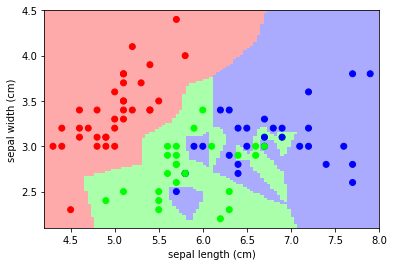

In [8]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()

#only take the first two features.
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)



x_min, x_max = X_train[:, 0].min() - .1, X_train[:, 0].max() + .1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

## 4. Another example

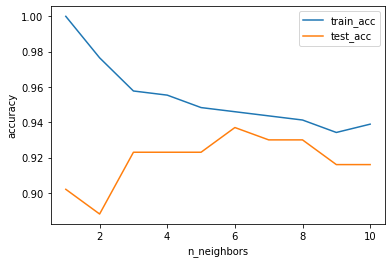

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # generate model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # store the training_accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # store the test_accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train_acc")
plt.plot(neighbors_settings, test_accuracy, label="test_acc")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()